Definir el tamaño del vector que representa cada reseña (20 palabras) y el máximo número de palabras con el que contarán todas las reseñas (10000)



In [ ]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Arquitectura de la red

In [ ]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

Definir los parámetros de entrenamiento

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 8)             80000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1312      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 81,345
Trainable params: 81,345
Non-trainable params: 0
_________________________________________________________________


Definir un conjunto de validación para validar si hay overfitting

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Entrenamiento con conjunto de entrenamiento y conjunto de validación

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
118/118 [==============================] - 2s 13ms/step - loss: 7.0294e-06 - acc: 1.0000 - val_loss: 3.3392 - val_acc: 0.6661
Epoch 2/10
118/118 [==============================] - 2s 13ms/step - loss: 1.2498e-04 - acc: 0.9999 - val_loss: 3.2360 - val_acc: 0.6698
Epoch 3/10
118/118 [==============================] - 2s 16ms/step - loss: 9.6039e-05 - acc: 1.0000 - val_loss: 3.2671 - val_acc: 0.6697
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 2.7436e-06 - acc: 1.0000 - val_loss: 3.4321 - val_acc: 0.6653
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 2.8123e-05 - acc: 1.0000 - val_loss: 3.5429 - val_acc: 0.6542
Epoch 6/10
118/118 [==============================] - 2s 13ms/step - loss: 1.7093e-05 - acc: 1.0000 - val_loss: 3.6355 - val_acc: 0.6513
Epoch 7/10
118/118 [==============================] - 1s 13ms/step - loss: 1.0200e-04 - acc: 0.9999 - val_loss: 3.5083 - val_acc: 0.6681
Epoch 8/10
118/118 [=====================

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Graficar pérdida del entrenamiento y pérdida de la validación en tiempo real

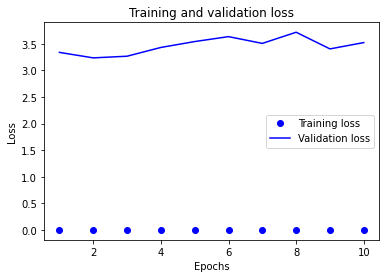

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Graficar accuracy del entrenamiento y accuracy de la validación en tiempo real

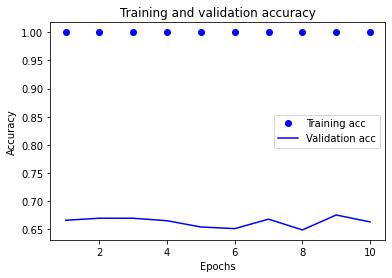

In [ ]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Probar el modelo con un conjunto independiente de prueba

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

782/782 [==============================] - 3s 4ms/step - loss: 3.5645 - acc: 0.6581
test_acc:  0.658079981803894
test_loss:  3.5645363330841064


Reentrenar un modelo, dejando los ejemplos de validación para el entrenamiento




In [ ]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
196/196 [==============================] - 3s 9ms/step - loss: 0.6427 - acc: 0.6109
Epoch 2/10
196/196 [==============================] - 2s 9ms/step - loss: 0.4866 - acc: 0.7675
Epoch 3/10
196/196 [==============================] - 2s 9ms/step - loss: 0.4209 - acc: 0.8056
Epoch 4/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3837 - acc: 0.8300
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3537 - acc: 0.8465
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.3270 - acc: 0.8595
Epoch 7/10
196/196 [==============================] - 2s 9ms/step - loss: 0.2968 - acc: 0.8765
Epoch 8/10
196/196 [==============================] - 2s 9ms/step - loss: 0.2655 - acc: 0.8928
Epoch 9/10
196/196 [==============================] - 2s 9ms/step - loss: 0.2340 - acc: 0.9077
Epoch 10/10
196/196 [==============================] - 2s 9ms/step - loss: 0.2028 - acc: 0.9219


Evaluamos de nuevo

In [ ]:
test_loss , test_acc = model.evaluate(x_test, y_test)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

782/782 [==============================] - 3s 3ms/step - loss: 0.7141 - acc: 0.7361
test_acc:  0.7360799908638
test_loss:  0.7141445875167847


Ejercicio:
----------
1. Probar apilando varias capas RNN ¿Mejora el accuracy?
2. Intente regularización y/o dropout para reducir el overfitting
3. ¿Sirve de algo aumentar el número de época? ¿y disminuirlas?